In [88]:
import warnings
warnings.filterwarnings('ignore')

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

In [90]:
pd.set_option("display.max_rows", None)

In [91]:
# Reading data
df = pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv", encoding='utf-8')

In [92]:
# Exploring data
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [93]:
# Exploring features
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [94]:
# Exploring dimensions
print("dataset contains {} rows and {} columns".format(df.shape[0],df.shape[1]))

dataset contains 51717 rows and 17 columns


In [95]:
# Exploring information summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [96]:
# Statistical summery
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


### Features definition:

* **url**: contains the url of the restaurant in the zomato website.
* **address:** contains the address of the restaurant in Bengaluru.
* **name:** contains the name of the restaurant.
* **online-order:** whether online ordering is available in the restaurant or not.
* **book-table:** table book option available or not.
* **rate:** contains the overall rating of the restaurant out of 5.
* **votes:** contains total number of rating for the restaurant as of the above mentioned date.
* **phone:** contains the phone number of the restaurant.
* **location:** contains the neighborhood in which the restaurant is located.
* **rest-type:** restaurant type.
* **dish_liked:** dishes people liked in the restaurant
* **cuisines:** food styles, separated by comma
* **approx_cost(for two people):** contains the approximate cost for meal for two people
* **reviews_list:** of tuples containing reviews for the restaurant, each tuple
* **menu_item:** contains list of menus available in the restaurant
* **listed_in(type):** type of meal
* **listed_in(city):** contains the neighborhood in which the restaurant is listed


In [97]:
df.rename(columns={
    'approx_cost(for two people)': 'average_cost',
    'listed_in(city)': 'neighborhood',
    'listed_in(type)': 'meal_type'},
          inplace=True)

In [98]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'average_cost', 'reviews_list', 'menu_item', 'meal_type',
       'neighborhood'],
      dtype='object')

## Data Preprocessing:

In [99]:
# check for nulls
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
average_cost      346
reviews_list        0
menu_item           0
meal_type           0
neighborhood        0
dtype: int64

In [100]:
# Nulls percentage
print("Percentage NaN values in df:")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage NaN values in df:


url              0.00
address          0.00
name             0.00
online_order     0.00
book_table       0.00
rate            15.03
votes            0.00
phone            2.34
location         0.04
rest_type        0.44
dish_liked      54.29
cuisines         0.09
average_cost     0.67
reviews_list     0.00
menu_item        0.00
meal_type        0.00
neighborhood     0.00
dtype: float64

drop missing values lessthan 1%:

In [101]:
df.dropna(subset = ['location','cuisines', 'rest_type', 'average_cost'],inplace = True)

In [102]:
df[df.menu_item == '[]'].shape[0]

39093

the menu_item contain too much empty data

In [103]:
df.drop('menu_item', axis = 1, inplace = True)

In [104]:
# check for nulls
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7615
votes               0
phone             869
location            0
rest_type           0
dish_liked      27713
cuisines            0
average_cost        0
reviews_list        0
meal_type           0
neighborhood        0
dtype: int64

**rate** , **phone** , **dish_liked** will be handled late in the notebook.

In [105]:
#Check for Duplicates
df.duplicated().sum()

0

- Although there is no dublicated data but there aren't 51k restaurants in Bengaluru. 
- **Then, How 51K (51k different link for each restaurant) restaurants were listed in the zomato website?**

- **The Answer is:** the data set was scraped individually for each category. Ex.: Buffet, dineout, pubs, bars, delivery, nightlife, etc. so it may have happened a restaurant was mentioned in more than one category.

### Univariate Analysis

#### What are the top known resturants?

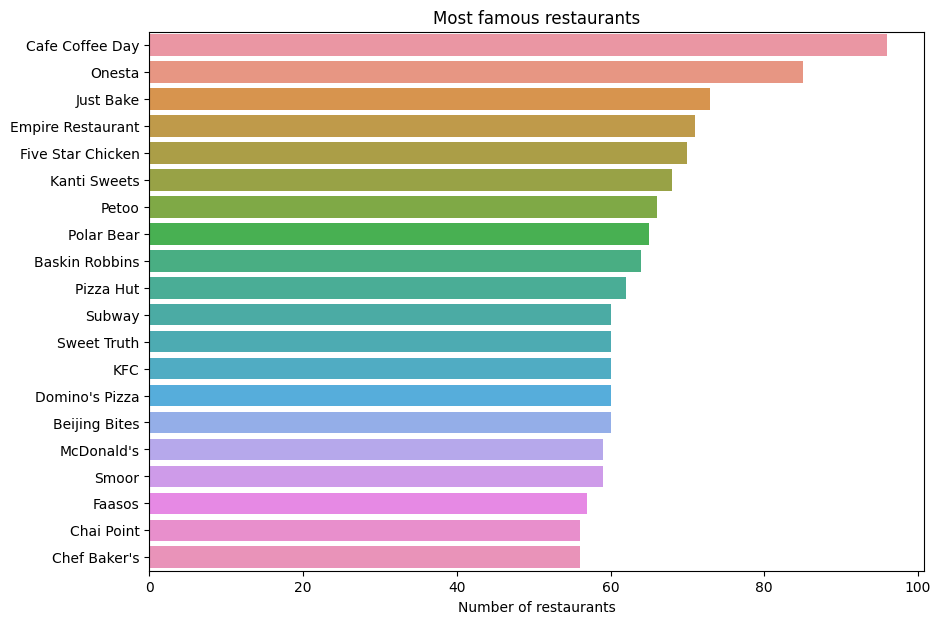

In [106]:
plt.figure(figsize=(10,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index)
plt.title("Most famous restaurants")
plt.xlabel("Number of restaurants");

In [107]:
# Number of repeated restaurants observations in different category features 
dub_res = df.duplicated(subset='name').sum()
# Number of resturants
uni_res = df.name.unique().size
# total number of obsercations
total_obs= df.shape[0]
print("Total number of observations =", total_obs)
print("Total number of unique resturant names =", uni_res)
print("Total number of dublicated resturants names =", dub_res)
# validate observations
print("Are the total sum of both unique resturant names and dublicated names equal to total sum of observations ?",
      dub_res + uni_res == total_obs)

Total number of observations = 51148
Total number of unique resturant names = 8723
Total number of dublicated resturants names = 42425
Are the total sum of both unique resturant names and dublicated names equal to total sum of observations ? True


#### What is the avilability percentage for ordaring online?

In [108]:
df.online_order.value_counts()

Yes    30311
No     20837
Name: online_order, dtype: int64

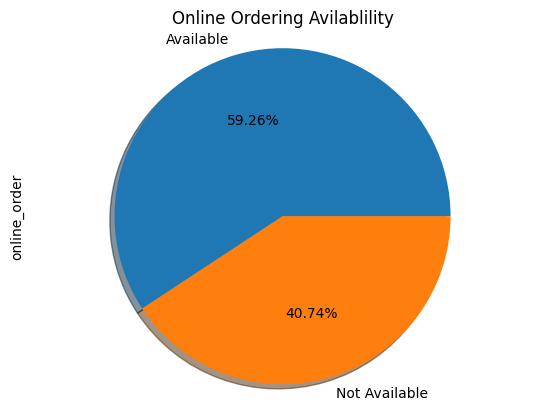

In [109]:
# Exploring features: online_order
df.online_order.value_counts().plot(kind='pie',labels= ['Available', 'Not Available'],  shadow=True, autopct='%1.2f%%')
plt.title('Online Ordering Avilablility')
plt.axis('equal')
plt.show();

In [110]:
df.book_table.value_counts()

No     44699
Yes     6449
Name: book_table, dtype: int64

#### What is the avilability percentage for booking a table?

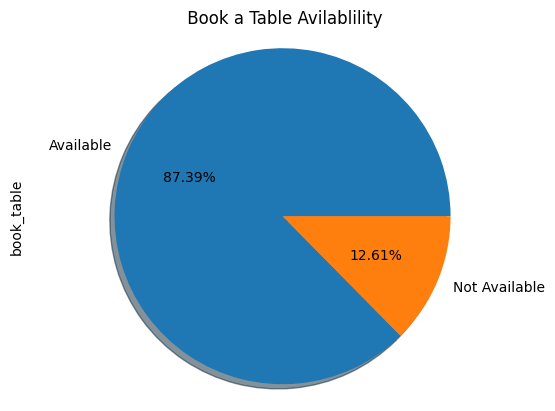

In [111]:
# Exploring features: book_table
df.book_table.value_counts().plot(kind='pie',labels= ['Available', 'Not Available'], shadow=True, autopct='%1.2f%%')
plt.title(' Book a Table Avilablility')
plt.axis('equal')
plt.show();

In [112]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [113]:
df.rate.value_counts(dropna=False)

NaN       7615
NEW       2205
3.9/5     2091
3.7/5     2008
3.8/5     1999
3.9 /5    1867
3.8 /5    1820
3.7 /5    1800
3.6/5     1754
4.0/5     1598
4.0 /5    1547
3.6 /5    1533
4.1/5     1471
4.1 /5    1457
3.5/5     1424
3.5 /5    1340
3.4/5     1250
3.4 /5    1197
3.3/5     1152
4.2 /5    1142
3.3 /5    1125
4.2/5     1013
3.2/5      997
4.3 /5     911
3.1/5      851
3.2 /5     848
4.3/5      772
3.1 /5     699
4.4 /5     627
3.0/5      544
4.4/5      519
3.0 /5     447
2.9/5      427
4.5 /5     409
2.9 /5     374
2.8/5      302
2.8 /5     278
4.5/5      247
4.6 /5     175
2.7/5      167
2.6/5      140
2.7 /5     136
4.6/5      125
2.6 /5     109
4.7 /5      86
4.7/5       81
-           65
2.5 /5      56
2.5/5       44
4.8 /5      43
2.4/5       36
4.9 /5      30
2.4 /5      30
2.3/5       28
4.9/5       25
2.3 /5      23
4.8/5       23
2.2/5       19
2.1 /5      13
2.1/5       11
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, dtype: int64

In [114]:
df['rate'] = df.rate.str.replace(' ', '').str.replace('/5', '').replace("NEW",np.NaN).replace("-", np.NaN).astype('float')

In [115]:
print("Percentage of Missing rate of all dataset:",
      (df.rate.isna().sum() * 100 / df.index.size).round(2))

print("the percentage is large to replace my median as it will bias our model, therefore it will be dropped")
df.dropna(subset = ['rate'], inplace=True)

Percentage of Missing rate of all dataset: 19.33
the percentage is large to replace my median as it will bias our model, therefore it will be dropped


#### What are the average rate of all restaurants?

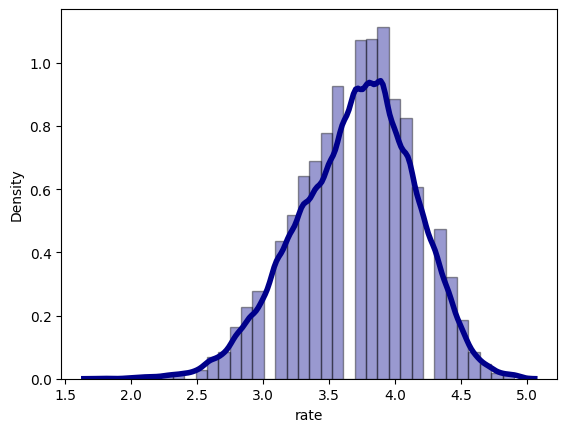

In [116]:
# Plot rating distribution
rating=df['rate'].astype('float')
sns.distplot(rating, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

#### what is the top rate of most of restaurants?

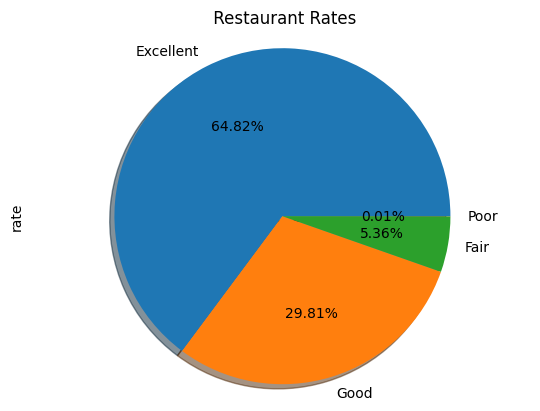

In [117]:
# Exploring features: rate
df.rate.astype('int').value_counts().plot(kind='pie',
                                          labels= ['Excellent', 'Good', 'Fair', 'Poor', 'Bad'],
                                          shadow=True, autopct='%1.2f%%')
plt.title(' Restaurant Rates')
plt.axis('equal')
plt.show();

#### What are the most popular locations for restaurants?

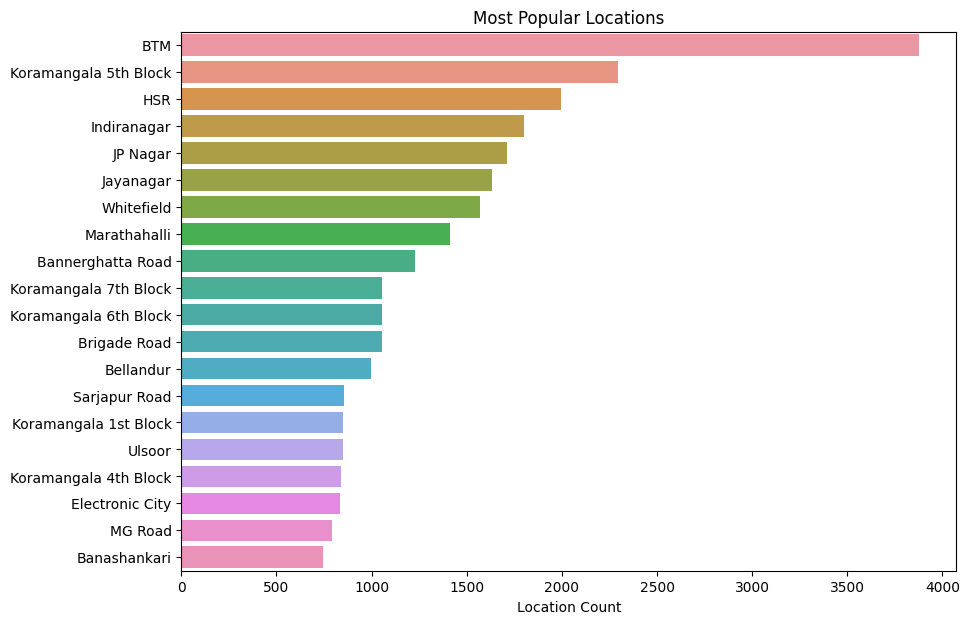

In [118]:
plt.figure(figsize=(10,7))
loc=df['location'].value_counts()[:20]
sns.barplot(x=loc,y=loc.index)
plt.title("Most Popular Locations")
plt.xlabel("Location Count");

#### What are the most popular restaurants type?

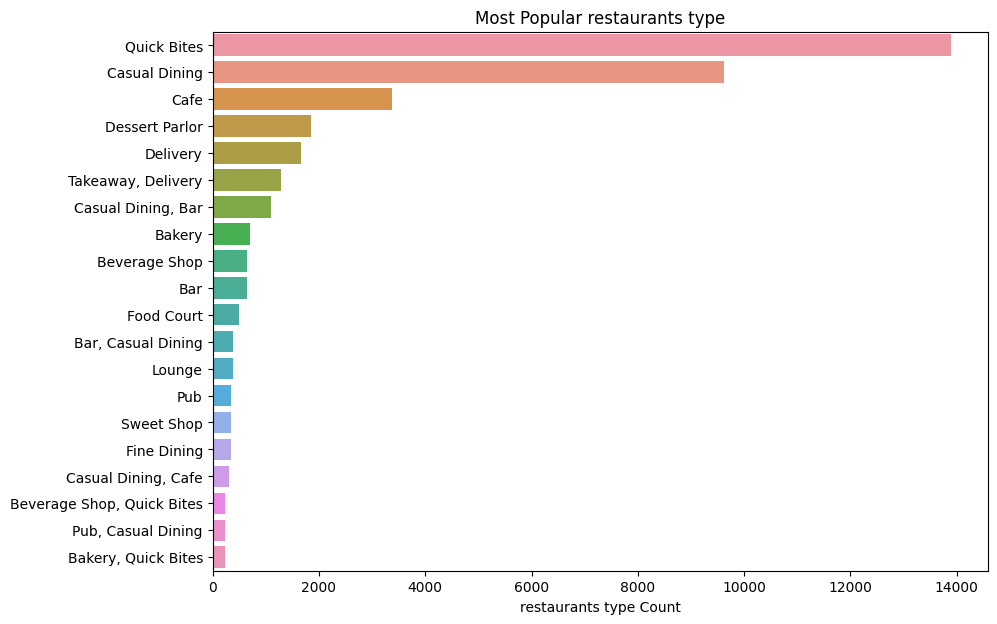

In [119]:
plt.figure(figsize=(10,7))
rest_type=df['rest_type'].value_counts()[:20]
sns.barplot(x=rest_type,y=rest_type.index)
plt.title("Most Popular restaurants type")
plt.xlabel("restaurants type Count");

#### What are the top 10 liked dishes?

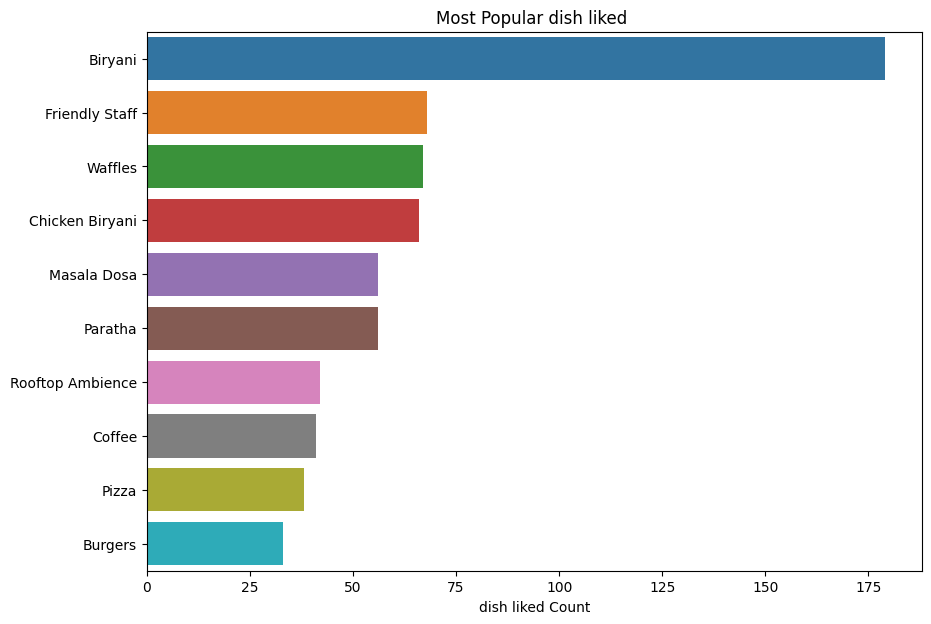

In [120]:
plt.figure(figsize=(10,7))
dish_liked=df['dish_liked'].value_counts()[:10]
sns.barplot(x=dish_liked,y=dish_liked.index)
plt.title("Most Popular dish liked ")
plt.xlabel("dish liked Count");

#### What are the most liked cuisines?

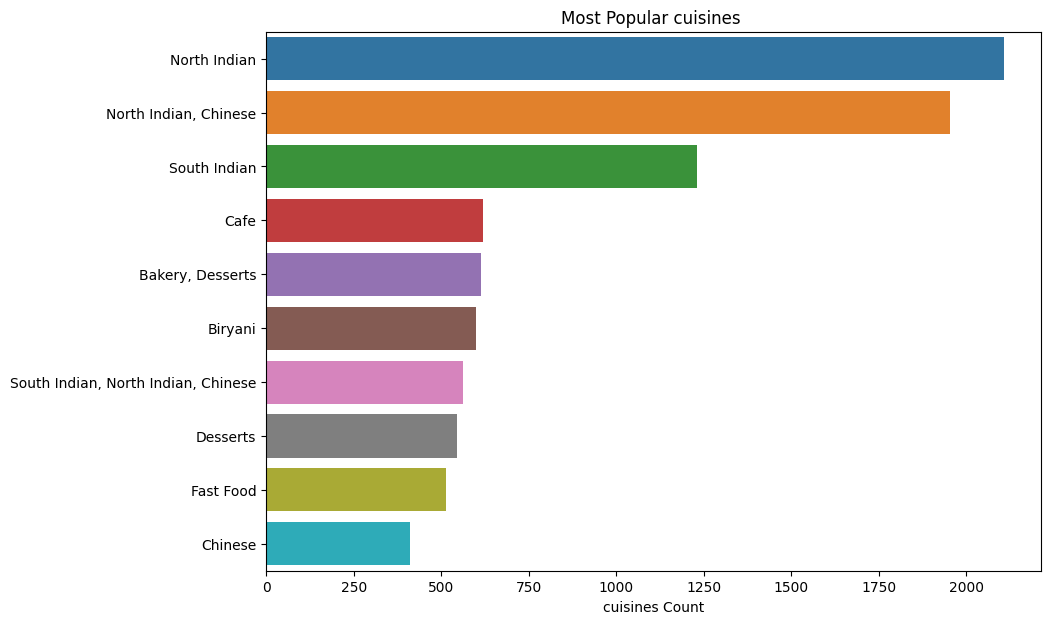

In [121]:
plt.figure(figsize=(10,7))
cuisines=df['cuisines'].value_counts()[:10]
sns.barplot(x=cuisines,y=cuisines.index)
plt.title("Most Popular cuisines ")
plt.xlabel("cuisines Count");

In [122]:
df.average_cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [123]:
df.dropna(subset = ['average_cost'], inplace=True)
df.average_cost = df.average_cost.str.replace(',','')
df.average_cost = df.average_cost.astype(int)

#### What is the average cost of causines?

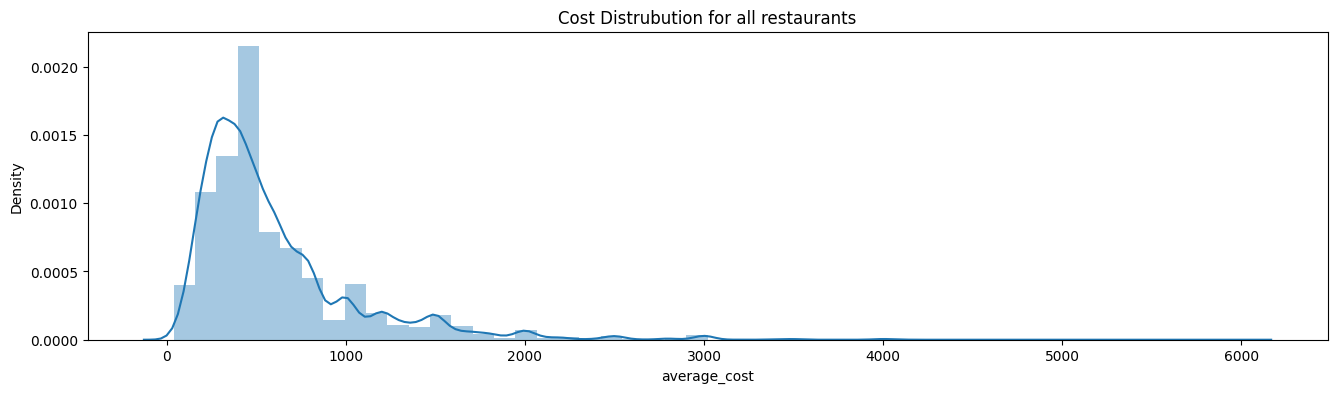

In [124]:
fig, ax = plt.subplots(figsize=[16,4])
sns.distplot(df['average_cost'],ax=ax)
ax.set_title('Cost Distrubution for all restaurants');

Reviews Extraction:

In [125]:
all_ratings = []

for name,ratings in tqdm(zip(df['name'],df['reviews_list'])):
    ratings = eval(ratings)
    for score, doc in ratings:
        if score:
            score = score.strip("Rated").strip()
            doc = doc.strip('RATED').strip()
            score = float(score)
            all_ratings.append([name,score, doc])

41263it [00:20, 1988.41it/s]


In [126]:
rating_df=pd.DataFrame(all_ratings,columns=['name','rating','review'])
rating_df['review']=rating_df['review'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [127]:
rating_df.to_csv("Ratings.csv")

#### What is the most repeated words in reviews?

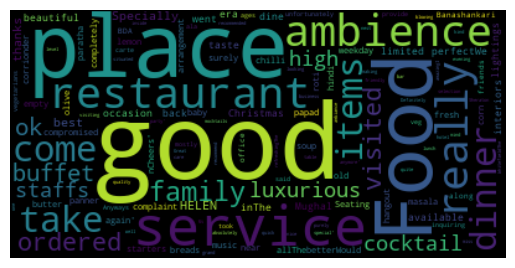

In [128]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(str(rating_df.review.values))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

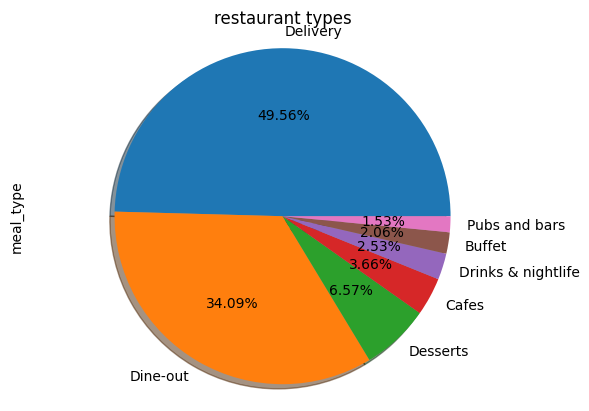

In [129]:
# Exploring features: meal_type
df.meal_type.value_counts().plot(kind='pie', shadow=True, autopct='%1.2f%%')
plt.title('restaurant types')
plt.axis('equal')
plt.show();

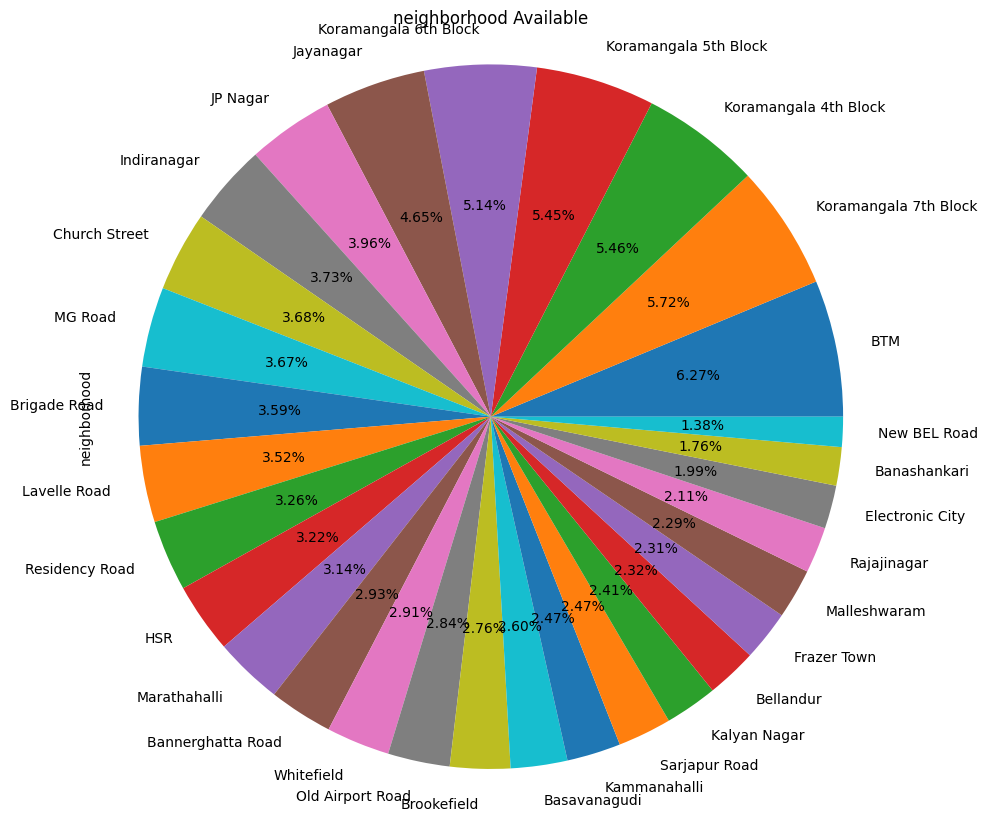

In [130]:
# Exploring features: neighborhood
plt.figure(figsize=(10,10))
df.neighborhood.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('neighborhood Available')
plt.axis('equal')
plt.show();

### Bivariate Analysis

#### What are top 3 restaurants famous for ?

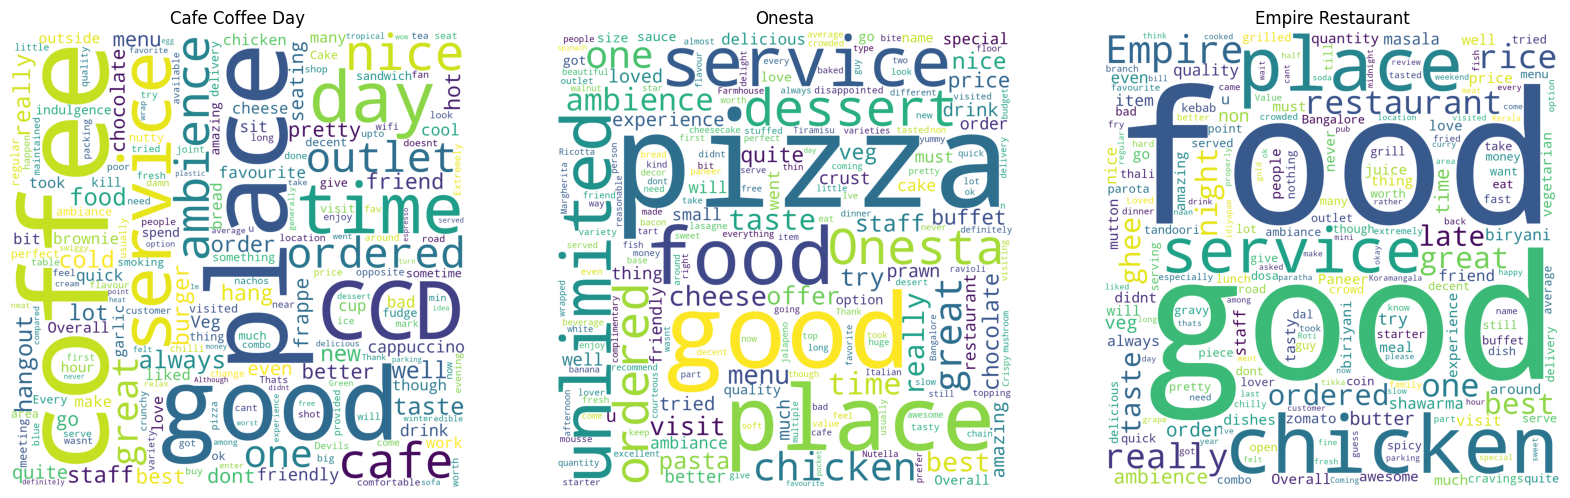

In [131]:
rest=df['name'].value_counts()[:3].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(1,3,i+1)
        corpus=rating_df[rating_df['name']==r]['review'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1500, height=1500).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")
        

        
        
produce_wordcloud(rest)

In [132]:
import os
os.remove("/kaggle/working/Ratings.csv")

### More Preprocessing

In [133]:
# check for nulls
df.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate                0
votes               0
phone             576
location            0
rest_type           0
dish_liked      18004
cuisines            0
average_cost        0
reviews_list        0
meal_type           0
neighborhood        0
dtype: int64

**dish_liked** has more than 50% missing values that could affect our data badly

In [134]:
# drop irrelevant features:
to_remove = ['url','address','name','phone','reviews_list','dish_liked']
df.drop(to_remove, axis = 1, inplace = True)

In [135]:
# check for nulls
df.isnull().sum()

online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
average_cost    0
meal_type       0
neighborhood    0
dtype: int64

In [136]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost,meal_type,neighborhood
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Feature Engineering

#### Feature Extraction

In [137]:
df['rest_type_count'] = df.rest_type.str.count(',') + 1
df['rest_type_count'].fillna(1,inplace = True)
df['cuisines_total'] = df.cuisines.str.count(',') + 1
df['cuisines_total'].fillna(1,inplace = True)

Note that we are prediction the luanch of new of new resturant so **votes** will note be helpful since a new restaurant will have no votes. therefore using this feature will cause our model to be baised.

In [138]:
df.drop(['cuisines','votes'], axis = 1, inplace = True)

In [139]:
df.head()

,online_order,book_table,rate,location,rest_type,average_cost,meal_type,neighborhood,rest_type_count,cuisines_total
0,Yes,Yes,4.1,Banashankari,Casual Dining,800,Buffet,Banashankari,1,3
1,Yes,No,4.1,Banashankari,Casual Dining,800,Buffet,Banashankari,1,3
2,Yes,No,3.8,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari,2,3
3,No,No,3.7,Banashankari,Quick Bites,300,Buffet,Banashankari,1,2
4,No,No,3.8,Basavanagudi,Casual Dining,600,Buffet,Banashankari,1,2


In [140]:
df['target'] = 0
df.loc[df['rate'] >= 3.7, 'target'] = 1

In [141]:
df.drop('rate', axis = 1, inplace = True)

In [142]:
df.head()

,online_order,book_table,location,rest_type,average_cost,meal_type,neighborhood,rest_type_count,cuisines_total,target
0,Yes,Yes,Banashankari,Casual Dining,800,Buffet,Banashankari,1,3,1
1,Yes,No,Banashankari,Casual Dining,800,Buffet,Banashankari,1,3,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",800,Buffet,Banashankari,2,3,1
3,No,No,Banashankari,Quick Bites,300,Buffet,Banashankari,1,2,1
4,No,No,Basavanagudi,Casual Dining,600,Buffet,Banashankari,1,2,1


In [143]:
newdf = df.copy()

## Modeling

In [144]:
# Splitting the data
X = newdf.drop('target', axis=1)
y = newdf['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

In [61]:
# Splitting into cat and num data
cat_features = [col for col, dtype in X_train.dtypes.items() if dtype == 'object']
num_features = [col for col, dtype in X_train.dtypes.items() if dtype != 'object']

In [86]:
# Building a numerical processing pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

# Building a categorical processing pipeline
cat_pipeline = Pipeline([
    ('encoder',pd.get_dummies(X,dummy_na=True))
])


# Building a complete Pipeline
full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

In [87]:
# Applying pipeline 
X_train_prep = full_pipeline.fit_transform(X_train)
X_test_prep = full_pipeline.fit_transform(X_test)
print(f'Shape of X_train_prep: {X_train_prep.shape}')
print(f'Shape of X_test_prep: {X_test_prep.shape}')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# returning categorical features after encoding and creating a new set of features after the pipeline
encoded_features = full_pipeline.named_transformers_['cat']['encoder'].features_after_encoding
model_features = num_features + encoded_features
print(f'\nSanity check! Number of features after the pipeline (must be the same as shape[1]): {len(model_features)}')

In [79]:
from sklearn.model_selection import GridSearchCV

In [81]:
# Logistic Regression hyperparameters
logreg_param_grid = {
    'C': np.linspace(0.1, 10, 20),
    'penalty': ['l1', 'l2'],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'solver': ['liblinear']
}

clf = LogisticRegression()
grid = GridSearchCV( estimator=clf, param_grid = logreg_param_grid)
# Set pipeline
final_pipe= Pipeline(steps = [('grid',grid)])
# fit pipeline
final_pipe.fit(X_train_prep, y_train)

Pipeline(steps=[('grid',
                 GridSearchCV(estimator=LogisticRegression(),
                              param_grid={'C': array([ 0.1       ,  0.62105263,  1.14210526,  1.66315789,  2.18421053,
        2.70526316,  3.22631579,  3.74736842,  4.26842105,  4.78947368,
        5.31052632,  5.83157895,  6.35263158,  6.87368421,  7.39473684,
        7.91578947,  8.43684211,  8.95789474,  9.47894737, 10.        ]),
                                          'class_weight': ['balanced', None],
                                          'penalty': ['l1', 'l2'],
                                          'random_state': [42],
                                          'solver': ['liblinear']}))])

In [82]:
# prediction
y_pred =final_pipe.predict(X_test_prep)

ValueError: X has 212 features, but LogisticRegression is expecting 222 features as input.

In [ ]:
# View Classification Report
print(classification_report(y_test,y_pred))

In [68]:
# Decision Trees hyperparameters
tree_param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [3, 5, 10, 20],
    'max_features': np.arange(1, X_train.shape[1]),
    'class_weight': ['balanced', None],
    'random_state': [42]
}

clf = DecisionTreeClassifier()
grid = GridSearchCV( estimator=clf, param_grid = tree_param_grid)
# Set pipeline
final_pipe= Pipeline(steps = [('grid',grid)])
# fit pipeline
final_pipe.fit(X_train_prep, y_train)

In [69]:
# Random Forest hyperparameters
forest_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [3, 5, 10, 20, 50],
    'n_estimators': [50, 100, 200, 500],
    'random_state': [42],
    'max_features': ['auto', 'sqrt'],
    'class_weight': ['balanced', None]
}

clf = RandomForestClassifier()
grid = GridSearchCV( estimator=clf, param_grid = forest_param_grid)
# Set pipeline
final_pipe= Pipeline(steps = [('grid',grid)])
# fit pipeline
final_pipe.fit(X_train_prep, y_train)

In [77]:
clf_tool.fit(set_classifiers, X_train_prep, y_train, random_search=True, cv=5, verbose=5)

NameError: name 'clf_tool' is not defined

In [ ]:
# Check Correlatiob between Amount, Time and Class
sns.heatmap(
    df.corr(),
    annot=True
);

In [ ]:
df.corr()['target'].abs().sort_values(ascending = False)

In [ ]:
# Random Forest Classifier
RF_model = RandomForestClassifier(class_weight = "balanced", random_state = 42)
RF_model.fit(x_train, y_train)
RF_feature_imp = pd.DataFrame(index=['online_order','book_table', 'votes', 'average_cost','type_count','cuisines_count'], data = RF_model.feature_importances_, columns = ['Importance']).sort_values("Importance", ascending = False)
RF_feature_imp

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x = ['online_order','book_table', 'votes', 'average_cost','type_count','cuisines_count'],
            y =RF_model.feature_importances_);

In [ ]:
x = df[['online_order','book_table', 'votes', 'average_cost','type_count','cuisines_count']]
y = df['target']

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

### Modeling

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

#### KNN

In [ ]:
test_score = []
for i in range(10):
    model = KNeighborsClassifier(n_neighbors = i+1)
    model.fit(x_train,y_train)
    test_score.append(model.score(x_test,y_test))
plt.plot([i for i in range(1,11)], test_score);

In [ ]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

#### Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)